# *Cluster Analysis* on Spotify dataset - Group 5

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importing Dataset

In [2]:
spotify_data = pd.read_csv("C:\\Users\\ASUS\\OneDrive\\Desktop\\WS2425\\Applied Statistical Data Analysis\\6.3.3_spotify_5000_songs.csv")
spotify_data.head(3)

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.259,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.399,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.851,0.730,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...


### EDA

In [3]:
spotify_data.columns

Index(['name                                                                                                                                                                             ',
       'artist                                          ', 'danceability ',
       'energy   ', 'key ', 'loudness ', 'mode ', 'speechiness ',
       'acousticness ', 'instrumentalness ', 'liveness ', 'valence ',
       'tempo   ', 'duration_ms ', 'time_signature ',
       'id                     ', 'html'],
      dtype='object')

In [4]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5235 entries, 0 to 5234
Data columns (total 17 columns):
 #   Column                                                                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                                                                             --------------  -----  
 0   name                                                                                                                                                                               5235 non-null   object 
 1   artist                                                                                                                                                                             5235 non-null   object 
 2   danceability                                            

In [5]:
spotify_data.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5.235000e+03,5235.000000
mean,0.509503,0.653565,5.254441,-9.338098,0.646227,0.083178,0.290043,0.257337,0.185354,0.443596,118.721407,2.479112e+05,3.902961
std,0.218041,0.288335,3.571559,6.294850,0.478185,0.071193,0.355985,0.370686,0.149410,0.277725,28.568463,1.356330e+05,0.420324
min,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.276000e+04,0.000000
25%,0.309000,0.479000,2.000000,-11.337000,0.000000,0.039000,0.002450,0.000001,0.092500,0.196000,96.174000,1.899910e+05,4.000000
50%,0.539000,0.738000,5.000000,-7.338000,1.000000,0.055800,0.095400,0.001880,0.125000,0.417000,119.180000,2.246670e+05,4.000000
75%,0.688000,0.893000,8.000000,-5.264000,1.000000,0.098650,0.565500,0.643000,0.237000,0.677000,134.019000,2.717200e+05,4.000000
max,0.967000,1.000000,11.000000,1.342000,1.000000,0.918000,0.996000,0.985000,0.987000,0.985000,213.990000,3.815787e+06,5.000000


In [6]:
spotify_data.isnull().sum().sum()

0

***The dataset doesn't have any null or missing values!***

#### Data Cleaning

In [7]:
# Clean up column names by stripping spaces and simplifying names
spotify_data.columns = spotify_data.columns.str.strip().str.lower().str.replace(" ", "_")

# Select numeric columns for clustering and check for missing values
features = [
    "danceability",
    "energy",
    "key",
    "loudness",
    "mode",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
]

# Drop rows with missing values in relevant columns
spotify_cleaned = spotify_data[features].dropna()
# Normalize the numeric features to bring them to a common scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized_features = scaler.fit_transform(spotify_cleaned)
# Display a preview of the normalized features
normalized_features[:5]

array([[ 0.6811158 , -1.36855551,  1.60885132, -0.60418673, -1.35154499,
        -0.17809927,  1.1348674 , -0.69412469,  5.28561005, -0.49548829,
        -0.29214747],
       [ 1.06640121, -0.88296272, -0.91129729, -0.52554351,  0.73989398,
        -0.68240921, -0.20520574, -0.69427799, -0.52447022,  0.8981087 ,
         0.22115982],
       [ 1.56635489,  0.26511736, -0.91129729, -0.27166095,  0.73989398,
         3.70607059,  0.45780739, -0.69411201, -0.41067833,  1.66152617,
        -0.87599383],
       [ 0.89669216, -2.09278246, -0.35126427, -1.39443193,  0.73989398,
        -0.50681383,  1.65460227, -0.6941738 ,  1.34305558,  0.28953534,
        -0.41726241],
       [ 0.64900869, -1.85414829,  0.20876876, -1.66324876,  0.73989398,
        -0.63464726,  1.75854924, -0.69335766, -0.54455115, -0.14978981,
         0.07770123]])

#### Visualization

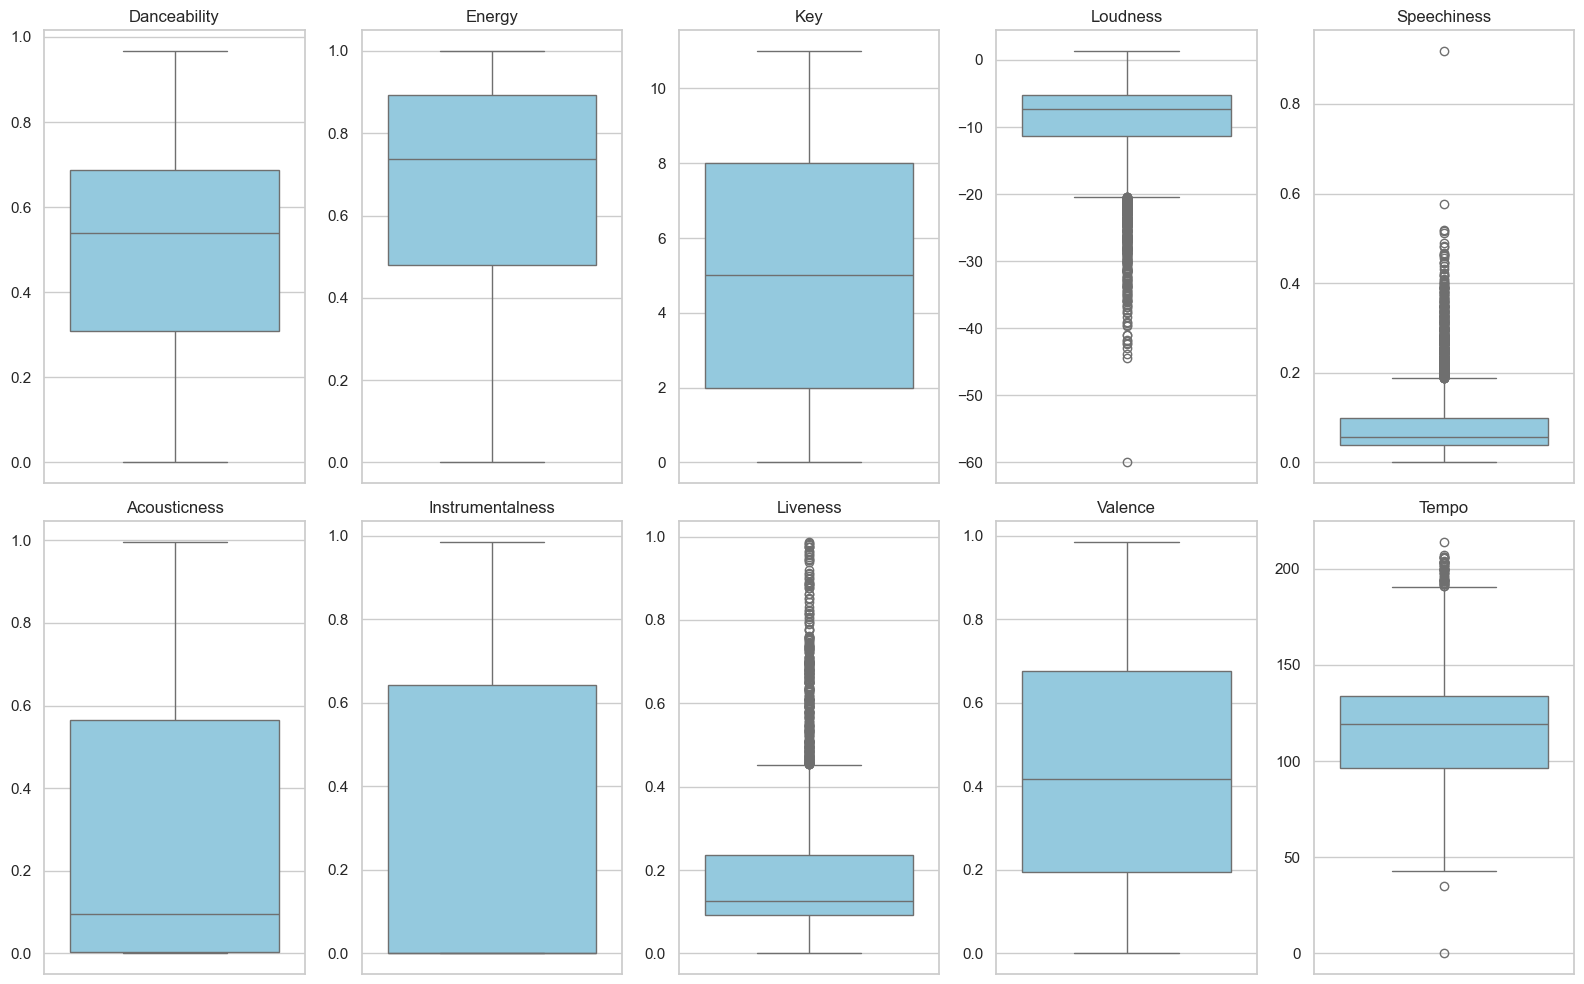

In [8]:
visual_features = [
    "danceability", "energy", "key", "loudness", "speechiness",
    "acousticness", "instrumentalness", "liveness", "valence", "tempo"
]

plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")

for i, feature in enumerate(visual_features, 1):
    plt.subplot(2, 5, i)  # Adjust grid dimensions as needed
    sns.boxplot(data=spotify_data, y=feature, color="skyblue")
    plt.title(feature.capitalize(), fontsize=12)
    plt.ylabel("")
    plt.xlabel("")

plt.tight_layout()
plt.show()

#### In search of number of clusters --> Elbow method (AKA Broken Stick)

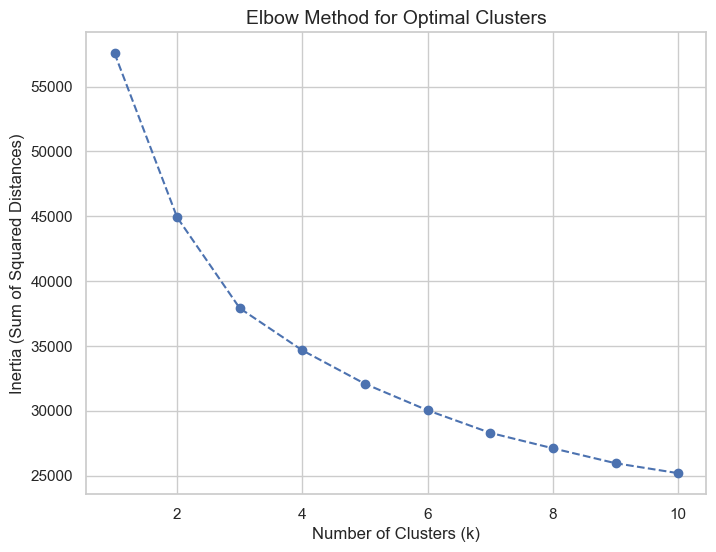

In [9]:
from sklearn.cluster import KMeans
# Range of cluster numbers to evaluate
cluster_range = range(1, 11)
inertia = []
# Calculate inertia for each number of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(normalized_features)
    inertia.append(kmeans.inertia_)
# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia (Sum of Squared Distances)', fontsize=12)
plt.grid(True)
plt.show()

#### Silhouette score

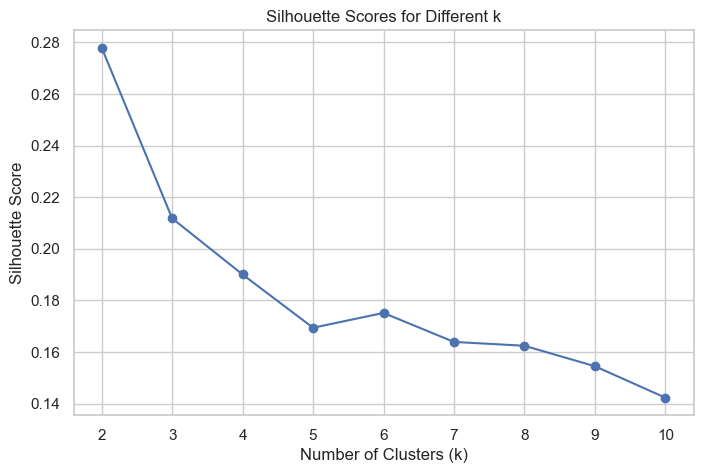

In [10]:
from sklearn.metrics import silhouette_score

# Calculate silhouette scores for a range of cluster numbers
silhouette_scores = []

for k in range(2, 11):  # Silhouette score is not defined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(normalized_features)
    score = silhouette_score(normalized_features, cluster_labels)
    silhouette_scores.append(score)

# Plotting silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

***Based on the elbow method and silhouette score, it's not that easy to choose a certain number of clusters. However, between 3 to 5 seems reasonable!***

#### PCA

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pd.DataFrame(pca.fit_transform(normalized_features), columns=['PC1', 'PC2'])

#### Dendrogram

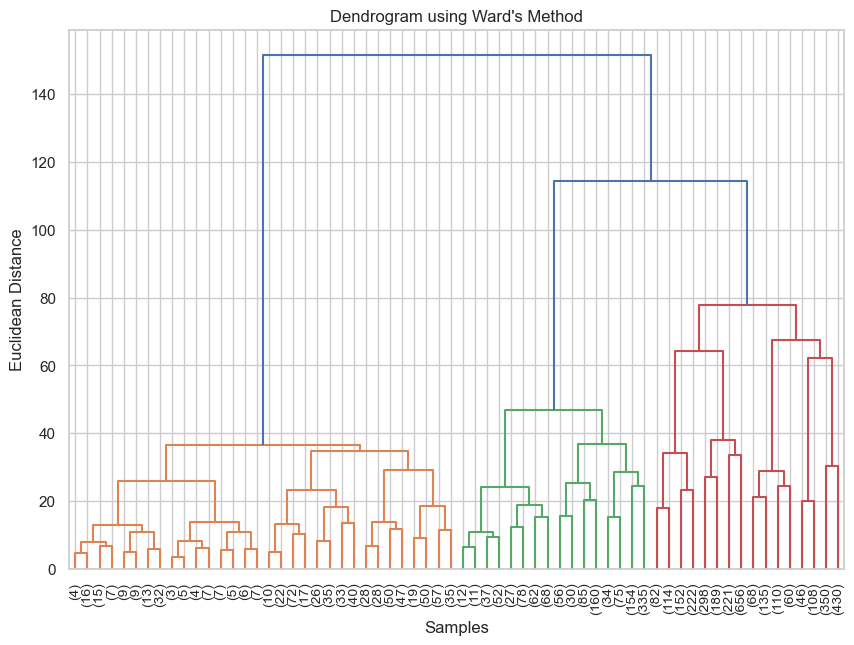

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Using Ward's method for hierarchical clustering
ward_linkage = linkage(normalized_features, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(ward_linkage, truncate_mode='level', p=5, leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrogram using Ward's Method")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.show()

#### Applying K-Means with 3 and 5 clusters

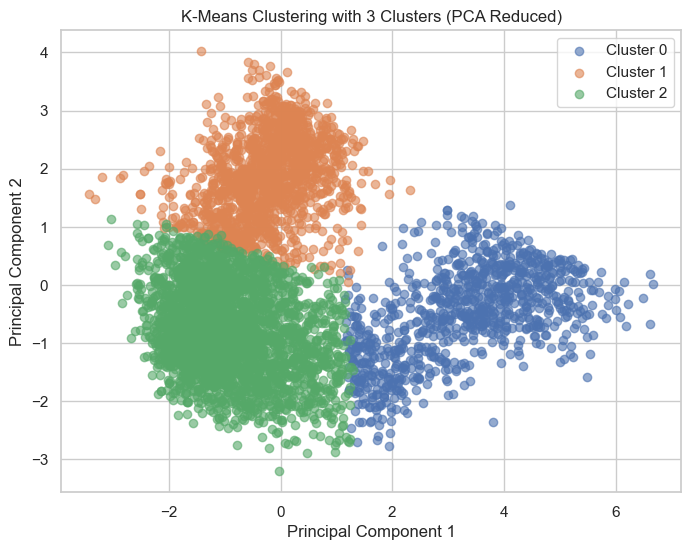

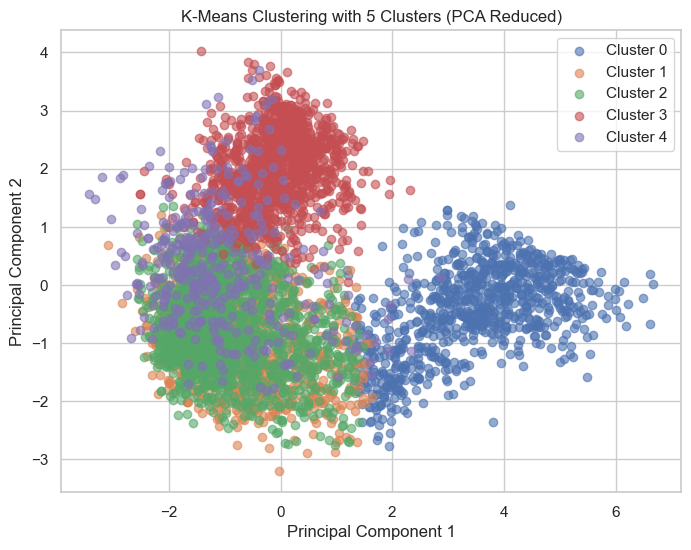

In [13]:
# Applying K-Means with 3 clusters (optimal K)
kmeans_3 = KMeans(n_clusters=3, random_state=42)
cluster_labels_3 = kmeans_3.fit_predict(normalized_features)

# Applying K-Means with 5 clusters (larger K)
kmeans_5 = KMeans(n_clusters=5, random_state=42)
cluster_labels_5 = kmeans_5.fit_predict(normalized_features)

# Adding cluster labels to PCA-reduced data for visualization
pca_data['Cluster_3'] = cluster_labels_3
pca_data['Cluster_5'] = cluster_labels_5

# Plotting results for 3 clusters
plt.figure(figsize=(8, 6))
for cluster in range(3):
    cluster_data = pca_data[pca_data['Cluster_3'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', alpha=0.6)
plt.title('K-Means Clustering with 3 Clusters (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Plotting results for 5 clusters
plt.figure(figsize=(8, 6))
for cluster in range(5):
    cluster_data = pca_data[pca_data['Cluster_5'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', alpha=0.6)
plt.title('K-Means Clustering with 5 Clusters (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

### Making playlists and assigning a name to them
#### For example:

In [ ]:
# Assign names to clusters based on their characteristics
cluster_names = {
    0: "Party Hits", # for example high energy and high danceability!
    1: "Chill Acoustic",
    2: "Feel-Good Tunes",
    3: "Instrumental Vibes",
    4: "Lively Grooves"
}

spotify_data['playlist_name'] = spotify_data['cluster'].map(cluster_names)

# Split songs into playlists and save each as a separate CSV file (we don't have to save the file of course!)
for cluster, name in cluster_names.items():
    cluster_songs = spotify_data[spotify_data['cluster'] == cluster]
    #cluster_songs.to_csv(f"{name.replace(' ', '_')}_playlist.csv", index=False)

# Display a summary of songs in each playlist
spotify_data.groupby('playlist_name')['name'].count()

### ***Five different playlists have been assigned:***
1) Party Hits --> High energy, High tempo
2) Relaxing Acoustic --> High acousticness, Low loudness
3) Feel-Good Tunes --> Balanced energy and danceability
4) Instrumental Vibes --> High instrumentalness
5) Lively Grooves --> High valence, high energy

In [14]:
# Assign names to clusters based on their characteristics
# Analyze cluster characteristics using feature averages
cluster_features = spotify_cleaned.copy()
cluster_features['Cluster'] = cluster_labels_5  # Using 5 clusters for detailed playlists

# Calculate the mean values of each feature per cluster
cluster_summary = cluster_features.groupby('Cluster').mean()
print("Cluster Summary (Average Feature Values):")
print(cluster_summary)

# Assign playlist names based on these characteristics
# Customize based on your interpretation of the cluster_summary
cluster_names = {
    0: "Party Hits",  # Example: High energy, high tempo
    1: "Relaxing Acoustic",  # Example: High acousticness, low loudness
    2: "Feel-Good Tunes",  # Example: Balanced energy and danceability
    3: "Instrumental Vibes",  # Example: High instrumentalness
    4: "Lively Grooves"  # Example: High valence and energy
}

# Map cluster labels to playlist names
spotify_data['Cluster'] = cluster_labels_5  # Ensure the clusters align
spotify_data['Playlist_Name'] = spotify_data['Cluster'].map(cluster_names)

# Visualize the distribution of songs across playlists
playlist_distribution = spotify_data['Playlist_Name'].value_counts().reset_index()
playlist_distribution.columns = ['Playlist_Name', 'Number_of_Songs']

# Display the result in a table format
print("\nPlaylist Distribution:")
print(playlist_distribution.to_markdown(index=False))

Cluster Summary (Average Feature Values):
         danceability    energy       key   loudness      mode  speechiness  \
Cluster                                                                       
0            0.349005  0.144090  5.091015 -20.387243  0.645274     0.044813   
1            0.646571  0.680202  1.741833  -7.105978  0.797610     0.074050   
2            0.660307  0.689949  8.056467  -6.851957  0.498359     0.081396   
3            0.277790  0.908088  5.310401  -7.744733  0.684685     0.113160   
4            0.559037  0.751203  5.815303  -6.868668  0.617414     0.110731   

         acousticness  instrumentalness  liveness   valence       tempo  
Cluster                                                                  
0            0.917189          0.612429  0.137411  0.197865  105.255083  
1            0.243554          0.039260  0.151200  0.620541  121.535662  
2            0.218695          0.041537  0.144442  0.601177  119.761272  
3            0.012558          0.5

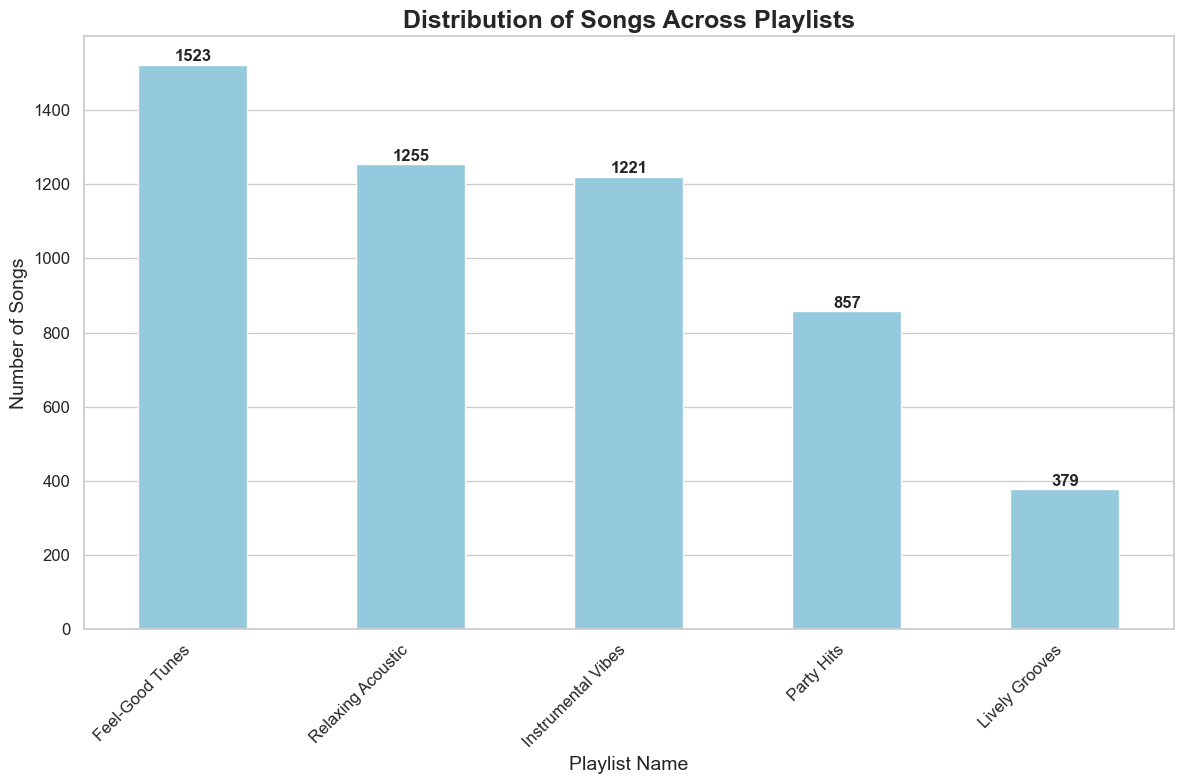

In [15]:
# Ensure playlist_distribution is a Series with the correct format
playlist_distribution = spotify_data['Playlist_Name'].value_counts()

# Convert the Series to a DataFrame for plotting
playlist_distribution_df = playlist_distribution.reset_index()
playlist_distribution_df.columns = ['Playlist_Name', 'Number_of_Songs']

# Visualize the distribution of songs across playlists
plt.figure(figsize=(12, 8))

# Create a bar plot of the playlist distribution with reduced bar width
sns.barplot(x='Playlist_Name', y='Number_of_Songs', data=playlist_distribution_df, color='skyblue', width=0.5)

# Add labels and title
plt.title('Distribution of Songs Across Playlists', fontsize=18, fontweight='bold')
plt.xlabel('Playlist Name', fontsize=14)
plt.ylabel('Number of Songs', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Display the count labels on top of the bars
for i, v in enumerate(playlist_distribution_df['Number_of_Songs']):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=12, fontweight='bold')

# Adjust layout for better readability
plt.tight_layout()

# Show the plot
plt.show()

In [16]:
for cluster, name in cluster_names.items():
    print(f"\n{name} Playlist:")
    playlist = spotify_data[spotify_data['Playlist_Name'] == name][['name', 'artist']].head(10).reset_index(drop=True)
    playlist.index += 1  # Start index from 1
    playlist['Index'] = playlist.index # Add the index as a column
    print(playlist[['Index', 'name', 'artist']].to_markdown(index=False))


Party Hits Playlist:
|   Index | name                                          | artist              |
|--------:|:----------------------------------------------|:--------------------|
|       1 | Mulher Eu Sei                                 | Chico César         |
|       2 | Rosa Morena                                   | Kurt Elling         |
|       3 | Desafinado                                    | Stan Getz           |
|       4 | Madalena                                      | Maria Gasolina      |
|       5 | The Girl From Ipanema                         | Stan Getz           |
|       6 | Não Sei                                       | Sílvia Pérez Cruz   |
|       7 | A Força Que Nunca Seca (feat. Maria Bethânia) | Chico César         |
|       8 | Aquarela Do Brasil                            | Carlos Barbosa-Lima |
|       9 | Brigas Nunca Mais                             | Brazilian Jazz      |
|      10 | Aquarela Do Brasil                            | Voyager         

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17568\2110357295.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=spotify_data, x="Playlist_Name", y=feature, palette="viridis")


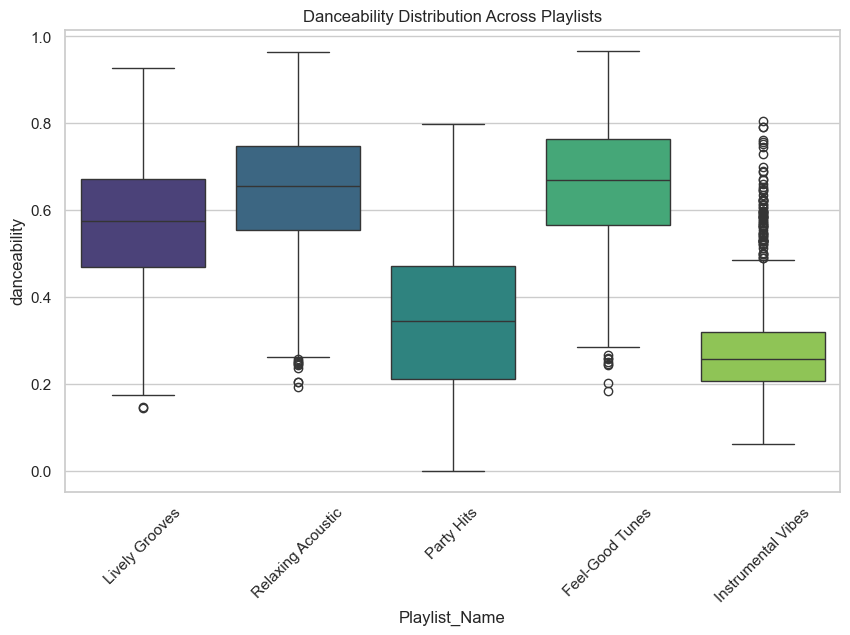

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17568\2110357295.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=spotify_data, x="Playlist_Name", y=feature, palette="viridis")


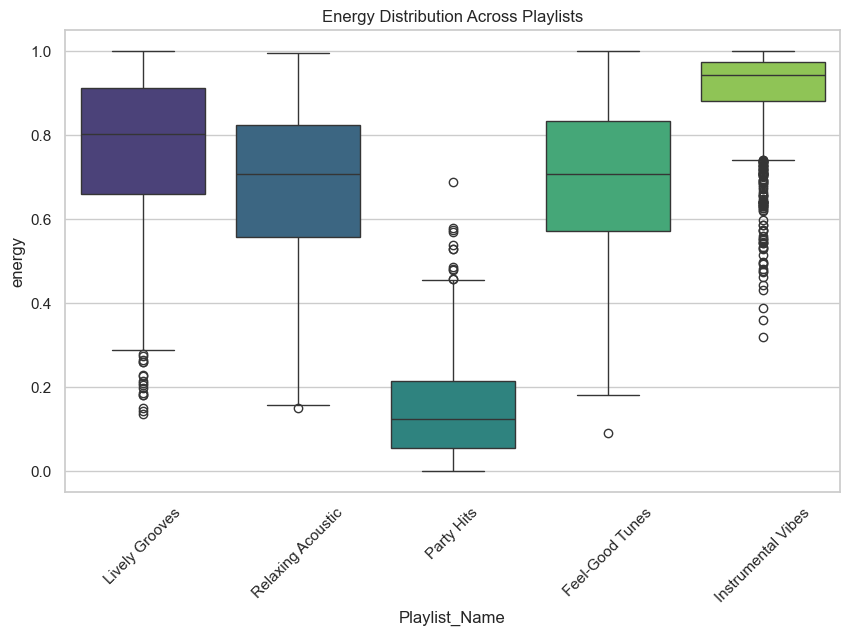

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17568\2110357295.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=spotify_data, x="Playlist_Name", y=feature, palette="viridis")


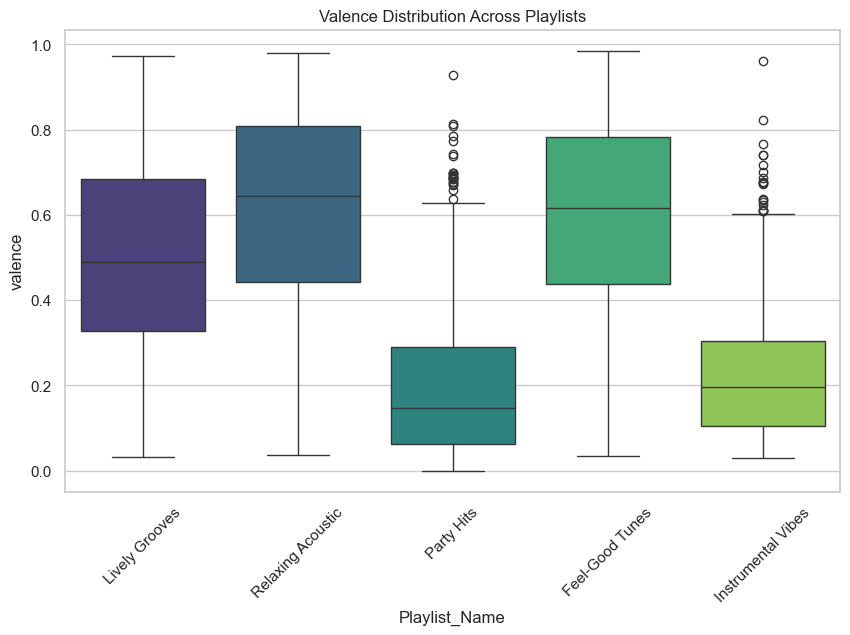


Playlists have been successfully created and analyzed!


In [17]:
# Optional: Visualize feature distributions per playlist (e.g., energy, danceability)
for feature in ["danceability", "energy", "valence"]:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=spotify_data, x="Playlist_Name", y=feature, palette="viridis")
    plt.title(f"{feature.capitalize()} Distribution Across Playlists")
    plt.xticks(rotation=45)
    plt.show()

# Save the playlists as separate files (optional)
# for cluster, name in cluster_names.items():
#     cluster_songs = spotify_data[spotify_data['Playlist_Name'] == name]
#     cluster_songs.to_csv(f"{name.replace(' ', '_')}_playlist.csv", index=False)

# Summary of the process
print("\nPlaylists have been successfully created and analyzed!")